Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 904847.17it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132895.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 279024.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2829426.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/100, Loss: 533.7047, Train Accuracy: 34.90%, Test Accuracy: 36.53%
Epoch 2/100, Loss: 512.4412, Train Accuracy: 49.12%, Test Accuracy: 51.49%
Epoch 3/100, Loss: 490.0148, Train Accuracy: 61.16%, Test Accuracy: 63.12%
Epoch 4/100, Loss: 463.2008, Train Accuracy: 66.01%, Test Accuracy: 67.74%
Epoch 5/100, Loss: 430.6208, Train Accuracy: 69.49%, Test Accuracy: 71.36%
Epoch 6/100, Loss: 392.6851, Train Accuracy: 72.71%, Test Accuracy: 74.10%
Epoch 7/100, Loss: 351.9106, Train Accuracy: 75.09%, Test Accuracy: 76.26%
Epoch 8/100, Loss: 312.1792, Train Accuracy: 77.52%, Test Accuracy: 78.39%
Epoch 9/100, Loss: 276.2831, Train Accuracy: 79.10%, Test Accuracy: 79.75%
Epoch 10/100, Loss: 245.9301, Train Accuracy: 80.85%, Test Accuracy: 81.36%
Epoch 11/100, Loss: 221.1532, Train Accuracy: 81.93%, Test Accuracy: 82.46%
Epoch 12/100, Loss: 201.1367, Train Accuracy: 82.78%, Test Accuracy: 83.43%
Epoch 13/100, Loss: 18

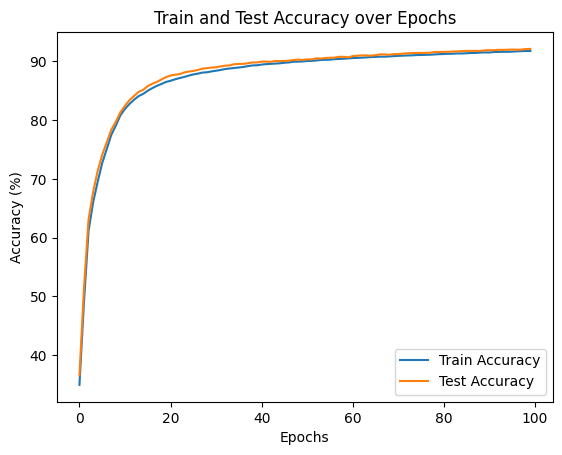

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform,
)
test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform,
)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=256,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=256,
    shuffle=False
)

# Define the model
class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)
        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # Flatten the image input
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)  # No activation function on the final layer (logits output)
        return x

# Model and optimizer setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model(28 * 28 * 1, 1024).to(device)  # input_dim: 28*28 (image size), n_dim: 1024
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Accuracy calculation function
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Train and test accuracy tracking
n_epochs = 100
train_acc_list = []
test_acc_list = []

for epoch in range(n_epochs):
    model.train()  # Set model to training mode
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        preds = model(inputs)  # Model predictions
        loss = nn.CrossEntropyLoss()(preds, labels)  # Loss calculation
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        total_loss += loss.item()  # Accumulate loss

    # Calculate accuracy for train and test data
    train_accuracy = calculate_accuracy(model, train_loader, device)
    test_accuracy = calculate_accuracy(model, test_loader, device)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# Plot accuracy
plt.plot(range(n_epochs), train_acc_list, label="Train Accuracy")
plt.plot(range(n_epochs), test_acc_list, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train and Test Accuracy over Epochs")
plt.legend()
plt.show()
